In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/HousingPrices-Amsterdam-August-2021.csv').drop(columns='Unnamed: 0')
data

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [ ]:
data_new = data.drop(columns=['Address','Zip'])
data_new

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...
919,750000.0,117,1,4.927757,52.354173
920,350000.0,72,3,4.890612,52.414587
921,350000.0,51,3,4.856935,52.363256
922,599000.0,113,4,4.965731,52.375268


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   920 non-null    float64
 1   Area    924 non-null    int64  
 2   Room    924 non-null    int64  
 3   Lon     924 non-null    float64
 4   Lat     924 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 36.2 KB


In [ ]:
data_new.dropna(inplace=True)

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   920 non-null    float64
 1   Area    920 non-null    int64  
 2   Room    920 non-null    int64  
 3   Lon     920 non-null    float64
 4   Lat     920 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 43.1 KB


In [ ]:
data_new.corr()

,Price,Area,Room,Lon,Lat
Price,1.000000,0.835090,0.623448,-0.013561,0.062196
Area,0.835090,1.000000,0.812421,0.012196,0.017993
Room,0.623448,0.812421,1.000000,-0.036585,-0.016381
Lon,-0.013561,0.012196,-0.036585,1.000000,-0.184436
Lat,0.062196,0.017993,-0.016381,-0.184436,1.000000


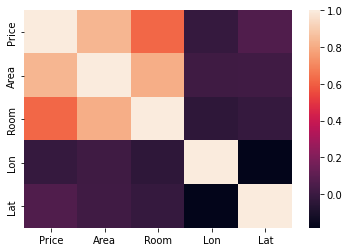

In [ ]:
sns.heatmap(data_new.corr())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_new[['Area','Room','Lon','Lat']], data_new['Price'], train_size=0.8)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled,y_train)

print(model.intercept_)
print(model.coef_)

623048.8111413092
[466385.24007387 -72558.05735481 -11920.45565078  25144.6630959 ]


In [ ]:
import pandas as pd

metric = pd.DataFrame()
metric['models'] = ['OLR','Poly3','OLR_reg','Poly3_reg']
r2_train = []
r2_test = []

## Ordinary Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('-------- TRAIN ---------')
y_pred = model.predict(X_train_scaled)
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',mean_squared_error(y_train,y_pred,squared=False))
print('R^2 score:',r2_score(y_train,y_pred))
r2_train.append(r2_score(y_train,y_pred))

print('-------- TEST ---------')
y_pred = model.predict(X_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('R^2 score:',r2_score(y_test,y_pred))
r2_test.append(r2_score(y_test,y_pred))

-------- TRAIN ---------
MAE: 170891.55974385038
MSE: 73651043442.76848
RMSE: 271387.25733307464
R^2 score: 0.696774722354337
-------- TEST ---------
MAE: 185325.3425003142
MSE: 134800764858.7571
RMSE: 367152.2366250233
R^2 score: 0.718817537219296


## Polynomial Features 3-degree Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train_poly)

X_train_scaled = scaler.transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled,y_train)

print('-------- TRAIN ---------')
y_pred = model.predict(X_train_scaled)
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',mean_squared_error(y_train,y_pred,squared=False))
print('R^2 score:',r2_score(y_train,y_pred))
r2_train.append(r2_score(y_train,y_pred))

print('-------- TEST ---------')
y_pred = model.predict(X_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('R^2 score:',r2_score(y_test,y_pred))
r2_test.append(r2_score(y_test,y_pred))

-------- TRAIN ---------
MAE: 116344.87373187288
MSE: 43306361166.16411
RMSE: 208101.80481236608
R^2 score: 0.8217053992094825
-------- TEST ---------
MAE: 150009.780380252
MSE: 115111527126.82855
RMSE: 339280.8970850386
R^2 score: 0.7598875442147257


## Ordinary Linear Regression + Regularization

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha=10, fit_intercept=True)
model.fit(X_train_scaled,y_train)

print('-------- TRAIN ---------')
y_pred = model.predict(X_train_scaled)
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',mean_squared_error(y_train,y_pred,squared=False))
print('R^2 score:',r2_score(y_train,y_pred))
r2_train.append(r2_score(y_train,y_pred))

print('-------- TEST ---------')
y_pred = model.predict(X_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('R^2 score:',r2_score(y_test,y_pred))
r2_test.append(r2_score(y_test,y_pred))

-------- TRAIN ---------
MAE: 170070.49838455132
MSE: 73779291800.68892
RMSE: 271623.4375025265
R^2 score: 0.6962467170183604
-------- TEST ---------
MAE: 186146.0759103599
MSE: 137343013986.0854
RMSE: 370598.1840026815
R^2 score: 0.7135146305824288


## Polynomial Features 3-degree Linear Regression + Regularization

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train_poly)

X_train_scaled = scaler.transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

model = Ridge(alpha=10,fit_intercept=True)
model.fit(X_train_scaled,y_train)

print('-------- TRAIN ---------')
y_pred = model.predict(X_train_scaled)
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',mean_squared_error(y_train,y_pred,squared=False))
print('R^2 score:',r2_score(y_train,y_pred))
r2_train.append(r2_score(y_train,y_pred))

print('-------- TEST ---------')
y_pred = model.predict(X_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('R^2 score:',r2_score(y_test,y_pred))
r2_test.append(r2_score(y_test,y_pred))

-------- TRAIN ---------
MAE: 161506.04454112923
MSE: 68072866381.39797
RMSE: 260907.77370825494
R^2 score: 0.719740375101743
-------- TEST ---------
MAE: 178321.72268582723
MSE: 137221384367.83154
RMSE: 370434.0486076186
R^2 score: 0.7137683391993164


In [ ]:
metric['R2_Train'] = r2_train
metric['R2_Test'] = r2_test

metric

,models,R2_Train,R2_Test
0,OLR,0.696775,0.718818
1,Poly3,0.821705,0.759888
2,OLR_reg,0.696247,0.713515
3,Poly3_reg,0.734148,0.709883


# Logistic Regression

In [ ]:
data_log = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/dementia_dataset.csv')
data_log = data_log[data_log['Group']!='Converted']
data_log

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  336 non-null    object 
 1   MRI ID      336 non-null    object 
 2   Group       336 non-null    object 
 3   Visit       336 non-null    int64  
 4   MR Delay    336 non-null    int64  
 5   M/F         336 non-null    object 
 6   Hand        336 non-null    object 
 7   Age         336 non-null    int64  
 8   EDUC        336 non-null    int64  
 9   SES         317 non-null    float64
 10  MMSE        334 non-null    float64
 11  CDR         336 non-null    float64
 12  eTIV        336 non-null    int64  
 13  nWBV        336 non-null    float64
 14  ASF         336 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 42.0+ KB


In [ ]:
data_log.dropna(inplace=True)
data_log

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
new_data_log = data_log.drop(columns=['Subject ID','MRI ID'])
new_data_log

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
data_num = new_data_log[new_data_log.describe().columns]
data_cat = new_data_log[['M/F','Hand']]
y = new_data_log['Group'].replace({'Nondemented':0,'Demented':1})

### Preprocessing data numerik

In [ ]:
data_num.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,2,538,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [ ]:
from scipy.stats import ttest_ind

#H0: Tidak ada perbedaan yang signifikan antara dimentia dan non dimentia terhadap suatu kolom
#H1: Ada perbedaan yang signifikan antara dimentia dan non dimentia terhadap suatu kolom

lab1_id = np.where(y==1)[0]
lab0_id = np.where(y==0)[0]

t,p_val = ttest_ind(data_num.iloc[lab1_id],data_num.iloc[lab0_id])

p_val_num = pd.DataFrame({'COLS':data_num.columns,'P-Value':p_val})
drop_cols = p_val_num[p_val_num['P-Value']>0.05]
drop_cols

,COLS,P-Value
2,Age,0.341040
7,eTIV,0.816196
9,ASF,0.932743


In [ ]:
data_num_new = data_num.drop(columns=drop_cols['COLS'])
data_num_new.head()

,Visit,MR Delay,EDUC,SES,MMSE,CDR,nWBV
0,1,0,14,2.0,27.0,0.0,0.696
1,2,457,14,2.0,30.0,0.0,0.681
5,1,0,18,3.0,28.0,0.0,0.710
6,2,538,18,3.0,27.0,0.0,0.718
7,1,0,12,4.0,28.0,0.0,0.712


### Preprocess data kategorik

In [ ]:
data_cat.head()

,M/F,Hand
0,M,R
1,M,R
5,F,R
6,F,R
7,M,R


In [ ]:
print(data_cat['M/F'].unique())
print(data_cat['Hand'].unique())

['M' 'F']
['R']


In [ ]:
from scipy.stats import chi2_contingency

#H0: Kolom dan Label tidak berkaitan
#H1: Kolom dan Label berkaitan
p_val = []
for col in data_cat.columns:
    contingency_table=pd.crosstab(data_cat[col],y)
    stat, p, dof, expected = chi2_contingency(contingency_table)
    p_val.append(p)

p_val_cat = pd.DataFrame({'COLS':data_cat.columns,'P-Value':p_val})
drop_cols = p_val_cat[p_val_cat['P-Value']>0.05]
drop_cols

,COLS,P-Value
1,Hand,1.0


In [ ]:
p_val_cat

,COLS,P-Value
0,M/F,0.000002
1,Hand,1.000000


In [ ]:
new_data_cat = data_cat['M/F'].replace({'M':1,'F':0})
new_data_cat.head()

0    1
1    1
5    0
6    0
7    1
Name: M/F, dtype: int64

In [ ]:
X = pd.concat([data_num_new,new_data_cat],axis=1)
X

,Visit,MR Delay,EDUC,SES,MMSE,CDR,nWBV,M/F
0,1,0,14,2.0,27.0,0.0,0.696,1
1,2,457,14,2.0,30.0,0.0,0.681,1
5,1,0,18,3.0,28.0,0.0,0.710,0
6,2,538,18,3.0,27.0,0.0,0.718,0
7,1,0,12,4.0,28.0,0.0,0.712,1
...,...,...,...,...,...,...,...,...
368,2,842,16,1.0,28.0,0.5,0.694,1
369,3,2297,16,1.0,26.0,0.5,0.675,1
370,1,0,13,2.0,30.0,0.0,0.801,0
371,2,763,13,2.0,30.0,0.0,0.796,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,stratify=y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2',C=0.01,solver='newton-cg')

model.fit(X_train_scaled,y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [ ]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy Train:',accuracy_score(y_train,y_pred_train))
print('Accuracy Test:',accuracy_score(y_test,y_pred_test))

Accuracy Train: 0.8972332015810277
Accuracy Test: 0.90625


In [ ]:
print('Score Train:',model.score(X_train_scaled, y_train))
print('Score Test:',model.score(X_test_scaled, y_test))

Score Train: 0.9960474308300395
Score Test: 0.984375
